In [ ]:
##################################################
# PROG8420 - Programming for Big Data           ##
# Final Project                                 ##
#                                               ##
# Submission Date: 20-Apr-2020                  ##
#                                               ##
# Team Members:                                 ##
#   1. Balamurugan Kalaiarasu (8680119)         ##
#   2. Aayush Vashistha (8681386)               ##
##################################################

# Data Cleaning and Preprocessing

In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# pandas styling
pd.options.display.max_rows = None
pd.options.display.max_colwidth = -1
pd.options.display.width = None
pd.options.display.max_columns = None

In [3]:
# Importing the dataset
dataset = pd.read_csv(r"C:\Users\Bala\OneDrive\Documents\Big_Data_Programming\Project\PythonCodes\new.csv", encoding= 'iso-8859-1')

C:\Users\Bala\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Displaying first few records
dataset.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030.html,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,¸ß 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217.html,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,¸ß 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636.html,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,ÖÐ 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841.html,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,µ× 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653.html,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,ÖÐ 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [5]:
# Displaying detailed info about variables 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
url                    318851 non-null object
id                     318851 non-null object
Lng                    318851 non-null float64
Lat                    318851 non-null float64
Cid                    318851 non-null int64
tradeTime              318851 non-null object
DOM                    160874 non-null float64
followers              318851 non-null int64
totalPrice             318851 non-null float64
price                  318851 non-null int64
square                 318851 non-null float64
livingRoom             318851 non-null object
drawingRoom            318851 non-null object
kitchen                318851 non-null int64
bathRoom               318851 non-null object
floor                  318851 non-null object
buildingType           316830 non-null float64
constructionTime       318851 non-null object
renovationCondition    318851 non-null int64
buildingStruct

In [6]:
# Displaying number of null on each variables
dataset.isnull().sum()

url                    0     
id                     0     
Lng                    0     
Lat                    0     
Cid                    0     
tradeTime              0     
DOM                    157977
followers              0     
totalPrice             0     
price                  0     
square                 0     
livingRoom             0     
drawingRoom            0     
kitchen                0     
bathRoom               0     
floor                  0     
buildingType           2021  
constructionTime       0     
renovationCondition    0     
buildingStructure      0     
ladderRatio            0     
elevator               32    
fiveYearsProperty      32    
subway                 32    
district               0     
communityAverage       463   
dtype: int64

In [7]:
# Removing columns which are not neccessary
dataset = dataset.iloc[:, 2:26]
dataset = dataset.drop('Cid', axis = 1)
# Removing DOM variable as its having more than 50% of null
dataset = dataset.drop('DOM', axis = 1)

In [8]:
# Displaying detailed info about variables 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 22 columns):
Lng                    318851 non-null float64
Lat                    318851 non-null float64
tradeTime              318851 non-null object
followers              318851 non-null int64
totalPrice             318851 non-null float64
price                  318851 non-null int64
square                 318851 non-null float64
livingRoom             318851 non-null object
drawingRoom            318851 non-null object
kitchen                318851 non-null int64
bathRoom               318851 non-null object
floor                  318851 non-null object
buildingType           316830 non-null float64
constructionTime       318851 non-null object
renovationCondition    318851 non-null int64
buildingStructure      318851 non-null int64
ladderRatio            318851 non-null float64
elevator               318819 non-null float64
fiveYearsProperty      318819 non-null float64
subway      

In [9]:
# Dealing with variables with type object

In [10]:
dataset['livingRoom'].value_counts()

2         83333
2         77256
1         42138
1         40248
3         36044
3         31567
4         3472 
4         3349 
5         570  
5         537  
6         126  
6         102  
#NAME?    32   
7         22   
0         17   
7         15   
0         11   
8         4    
8         3    
9         3    
9         2    
Name: livingRoom, dtype: int64

In [11]:
dataset['drawingRoom'].value_counts()

1        115876
1        109783
2        39084 
2        33418 
0        11300 
0        8386  
3        474   
3        444   
4        31    
4        16    
µÍ 6     7     
ÖÐ 6     6     
5        5     
ÖÐ 16    3     
5        2     
¶¥ 6     2     
¸ß 14    2     
ÖÐ 14    2     
µ× 20    1     
ÖÐ 22    1     
ÖÐ 24    1     
µÍ 16    1     
µ× 28    1     
¸ß 6     1     
ÖÐ 15    1     
µ× 11    1     
¸ß 12    1     
µÍ 15    1     
Name: drawingRoom, dtype: int64

In [12]:
dataset['bathRoom'].value_counts()

1       206915
1       54573 
2       42367 
2       10239 
3       2712  
0       804   
3       528   
4       425   
0       111   
4       64    
5       53    
5       16    
6       9     
2006    9     
2003    5     
2004    4     
2000    3     
2003    2     
1990    2     
7       2     
Î´Öª    2     
2005    2     
1994    1     
7       1     
1996    1     
2011    1     
Name: bathRoom, dtype: int64

In [13]:
dataset['floor'].value_counts()

ÖÐ 6        34788
¶¥ 6        22763
¸ß 6        20904
µÍ 6        15737
µ× 6        13338
ÖÐ 5        8227 
ÖÐ 18       7982 
¸ß 18       6536 
µÍ 18       6258 
ÖÐ 16       6151 
ÖÐ 7        4914 
ÖÐ 24       4764 
ÖÐ 11       4549 
µÍ 16       4174 
ÖÐ 20       4145 
¸ß 24       4014 
¸ß 16       4003 
ÖÐ 14       3993 
µÍ 24       3941 
ÖÐ 22       3465 
ÖÐ 12       3196 
ÖÐ 21       3124 
¶¥ 5        3075 
ÖÐ 26       2796 
ÖÐ 28       2726 
µÍ 21       2632 
ÖÐ 15       2572 
µÍ 22       2549 
µÍ 20       2544 
¸ß 22       2540 
¸ß 21       2540 
¸ß 20       2442 
ÖÐ 9        2442 
ÖÐ 10       2394 
¸ß 12       2369 
ÖÐ 17       2366 
ÖÐ 25       2344 
µÍ 12       2261 
¸ß 28       2183 
µÍ 28       2078 
µ× 5        2073 
µÍ 15       1980 
¸ß 15       1909 
µÍ 26       1885 
µÍ 14       1874 
¸ß 14       1872 
ÖÐ 19       1868 
¸ß 25       1837 
¸ß 26       1820 
ÖÐ 13       1804 
¸ß 11       1804 
µÍ 25       1777 
µÍ 11       1748 
¸ß 7        1728 
ÖÐ 27       1709 
µÍ 9      

In [14]:
dataset['constructionTime'].value_counts().head(30)

2004    21145
2003    19409
Î´Öª    19283
2005    18924
2006    14854
2007    14213
2000    13903
2002    12358
2008    12162
2009    11565
1998    11308
2001    10597
1999    10204
1995    9073 
1996    9068 
1992    8482 
1990    8394 
1994    7735 
2010    7243 
1993    6754 
1997    6463 
1988    5576 
2011    5520 
1989    5493 
2012    5057 
1987    4943 
1986    4865 
1985    4705 
1991    4329 
1984    3349 
Name: constructionTime, dtype: int64

In [15]:
# Creating method to find and replace invalid data with np.nan
def replacenull(data, length):
    if data.isdigit() and len(data) == length:
        return int(data)
    else:
        return np.nan

In [16]:
# Replacing np.nan for the below variables which have unreadable characters
dataset['livingRoom']= dataset['livingRoom'].apply(lambda x: replacenull(str(x), 1))
dataset['drawingRoom']= dataset['drawingRoom'].apply(lambda x: replacenull(str(x), 1))
dataset['bathRoom']= dataset['bathRoom'].apply(lambda x: replacenull(str(x), 1))
dataset['constructionTime']= dataset['constructionTime'].apply(lambda x: replacenull(str(x), 4))

In [17]:
# Finding categorical values
for item in dataset.columns:
    print(dataset[item].value_counts().head(15))
    print('---------------------------')

116.343245    1526
116.609957    1514
116.439420    1350
116.330198    1334
116.512916    1265
116.247008    1247
116.441781    1174
116.416156    1060
116.431552    885 
116.415742    874 
116.432684    872 
116.530553    854 
116.477730    756 
116.439341    739 
116.346630    731 
Name: Lng, dtype: int64
---------------------------
39.900529    1526
39.919830    1514
40.072066    1350
40.074228    1334
39.906426    1247
39.991956    1174
40.082585    1060
40.082903    885 
40.077796    874 
40.077562    872 
39.921425    854 
39.864254    782 
40.002156    756 
40.082372    739 
40.096608    731 
Name: Lat, dtype: int64
---------------------------
2016-02-28    1096
2016-03-06    948 
2016-07-31    940 
2016-08-31    910 
2016-03-05    824 
2016-08-29    823 
2016-02-27    796 
2017-02-27    765 
2016-08-30    742 
2017-02-28    707 
2016-02-21    686 
2015-12-13    682 
2015-12-20    677 
2016-03-13    646 
2015-12-06    636 
Name: tradeTime, dtype: int64
--------------------------

In [18]:
# Correcting invalid values in buildingType variable
filt = dataset['buildingType'] < 1
dataset.loc[filt, 'buildingType'] = 0
dataset['buildingType'] = dataset['buildingType'].replace(to_replace=0,value=dataset['buildingType'].mode()[0])

In [19]:
# Correcting invalid values in renovationCondition variable
filt = dataset['renovationCondition'] < 1
dataset.loc[filt, 'renovationCondition'] = 1

In [20]:
# Correcting invalid values in buildingStructure variable
filt = dataset['buildingStructure'] < 1
dataset.loc[filt, 'buildingStructure'] = 1

In [21]:
# Displaying number of null on each variables
dataset.isnull().sum()

Lng                    0    
Lat                    0    
tradeTime              0    
followers              0    
totalPrice             0    
price                  0    
square                 0    
livingRoom             32   
drawingRoom            32   
kitchen                0    
bathRoom               32   
floor                  0    
buildingType           2021 
constructionTime       19315
renovationCondition    0    
buildingStructure      0    
ladderRatio            0    
elevator               32   
fiveYearsProperty      32   
subway                 32   
district               0    
communityAverage       463  
dtype: int64

In [22]:
# Displaying detailed info about variables 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 22 columns):
Lng                    318851 non-null float64
Lat                    318851 non-null float64
tradeTime              318851 non-null object
followers              318851 non-null int64
totalPrice             318851 non-null float64
price                  318851 non-null int64
square                 318851 non-null float64
livingRoom             318819 non-null float64
drawingRoom            318819 non-null float64
kitchen                318851 non-null int64
bathRoom               318819 non-null float64
floor                  318851 non-null object
buildingType           316830 non-null float64
constructionTime       299536 non-null float64
renovationCondition    318851 non-null int64
buildingStructure      318851 non-null int64
ladderRatio            318851 non-null float64
elevator               318819 non-null float64
fiveYearsProperty      318819 non-null float64
subway  

In [23]:
# Method to split floor into floor type and floor number
def floortype(data):
    temp = data.split(' ')
    if len(temp) == 2:
        return temp[0]
    else:
        return np.nan

def floornumber(data):
    temp = data.split(' ')
    if len(temp) == 2:
        return int(temp[1])
    else:
        return np.nan

In [24]:
# Splitting floor into floor type and number
dataset['floorType']= dataset['floor'].apply(lambda x: floortype(x))
dataset['floorNumber']= dataset['floor'].apply(lambda x: floornumber(x))

In [25]:
# Displaying detailed info about variables 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 24 columns):
Lng                    318851 non-null float64
Lat                    318851 non-null float64
tradeTime              318851 non-null object
followers              318851 non-null int64
totalPrice             318851 non-null float64
price                  318851 non-null int64
square                 318851 non-null float64
livingRoom             318819 non-null float64
drawingRoom            318819 non-null float64
kitchen                318851 non-null int64
bathRoom               318819 non-null float64
floor                  318851 non-null object
buildingType           316830 non-null float64
constructionTime       299536 non-null float64
renovationCondition    318851 non-null int64
buildingStructure      318851 non-null int64
ladderRatio            318851 non-null float64
elevator               318819 non-null float64
fiveYearsProperty      318819 non-null float64
subway  

In [26]:
# Displaying first few records
dataset.head()

,Lng,Lat,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,floorType,floorNumber
0,116.475489,40.019520,2016-08-09,106,415.0,31680,131.00,2.0,1.0,1,1.0,¸ß 26,1.0,2005.0,3,6,0.217,1.0,0.0,1.0,7,56021.0,¸ß,26.0
1,116.453917,39.881534,2016-07-28,126,575.0,43436,132.38,2.0,2.0,1,2.0,¸ß 22,1.0,2004.0,4,6,0.667,1.0,1.0,0.0,7,71539.0,¸ß,22.0
2,116.561978,39.877145,2016-12-11,48,1030.0,52021,198.00,3.0,2.0,1,3.0,ÖÐ 4,4.0,2005.0,3,6,0.500,1.0,0.0,0.0,7,48160.0,ÖÐ,4.0
3,116.438010,40.076114,2016-09-30,138,297.5,22202,134.00,3.0,1.0,1,1.0,µ× 21,1.0,2008.0,1,6,0.273,1.0,0.0,0.0,6,51238.0,µ×,21.0
4,116.428392,39.886229,2016-08-28,286,392.0,48396,81.00,2.0,1.0,1,1.0,ÖÐ 6,4.0,1960.0,2,2,0.333,0.0,1.0,1.0,1,62588.0,ÖÐ,6.0


In [27]:
# Dropping floor variable
dataset = dataset.drop('floor', axis = 1)

In [28]:
dataset['floorType'].value_counts()

ÖÐ      119832
¸ß      70094 
µÍ      64136 
¶¥      37406 
µ×      26080 
Î´Öª    1271  
Name: floorType, dtype: int64

In [29]:
# Displaying first few records
dataset.head()

,Lng,Lat,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,floorType,floorNumber
0,116.475489,40.019520,2016-08-09,106,415.0,31680,131.00,2.0,1.0,1,1.0,1.0,2005.0,3,6,0.217,1.0,0.0,1.0,7,56021.0,¸ß,26.0
1,116.453917,39.881534,2016-07-28,126,575.0,43436,132.38,2.0,2.0,1,2.0,1.0,2004.0,4,6,0.667,1.0,1.0,0.0,7,71539.0,¸ß,22.0
2,116.561978,39.877145,2016-12-11,48,1030.0,52021,198.00,3.0,2.0,1,3.0,4.0,2005.0,3,6,0.500,1.0,0.0,0.0,7,48160.0,ÖÐ,4.0
3,116.438010,40.076114,2016-09-30,138,297.5,22202,134.00,3.0,1.0,1,1.0,1.0,2008.0,1,6,0.273,1.0,0.0,0.0,6,51238.0,µ×,21.0
4,116.428392,39.886229,2016-08-28,286,392.0,48396,81.00,2.0,1.0,1,1.0,4.0,1960.0,2,2,0.333,0.0,1.0,1.0,1,62588.0,ÖÐ,6.0


In [30]:
# Displaying numerical stats
dataset.describe()

,Lng,Lat,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,floorNumber
count,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,318819.000000,318819.000000,318851.000000,318819.000000,316830.000000,299536.000000,318851.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000,318819.000000
mean,116.418459,39.949591,16.731508,349.030201,43530.436379,83.240597,2.010370,1.171950,0.994599,1.188122,3.010157,1999.216021,2.606412,4.451114,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305,13.299910
std,0.112054,0.091983,34.209185,230.780778,21709.024204,37.234661,0.776822,0.522287,0.109609,0.437544,1.269617,8.777396,1.311608,1.901571,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447,7.826689
min,116.072514,39.627030,0.000000,0.100000,1.000000,6.900000,0.000000,0.000000,0.000000,0.000000,1.000000,1906.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000,1.000000
25%,116.344985,39.893200,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1994.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000,6.000000
50%,116.416780,39.934527,5.000000,294.000000,38737.000000,74.260000,2.000000,1.000000,1.000000,1.000000,4.000000,2001.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000,11.000000
75%,116.477581,40.003018,18.000000,425.500000,53819.500000,98.710000,2.000000,1.000000,1.000000,1.000000,4.000000,2006.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000,19.000000
max,116.732378,40.252758,1143.000000,18130.000000,156250.000000,1745.500000,9.000000,5.000000,4.000000,7.000000,4.000000,2016.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000,63.000000


In [31]:
# Displaying number of null on each variables
dataset.isnull().sum()

Lng                    0    
Lat                    0    
tradeTime              0    
followers              0    
totalPrice             0    
price                  0    
square                 0    
livingRoom             32   
drawingRoom            32   
kitchen                0    
bathRoom               32   
buildingType           2021 
constructionTime       19315
renovationCondition    0    
buildingStructure      0    
ladderRatio            0    
elevator               32   
fiveYearsProperty      32   
subway                 32   
district               0    
communityAverage       463  
floorType              32   
floorNumber            32   
dtype: int64

In [32]:
# Displaying number of null on each variables
dataset.isnull().sum()

Lng                    0    
Lat                    0    
tradeTime              0    
followers              0    
totalPrice             0    
price                  0    
square                 0    
livingRoom             32   
drawingRoom            32   
kitchen                0    
bathRoom               32   
buildingType           2021 
constructionTime       19315
renovationCondition    0    
buildingStructure      0    
ladderRatio            0    
elevator               32   
fiveYearsProperty      32   
subway                 32   
district               0    
communityAverage       463  
floorType              32   
floorNumber            32   
dtype: int64

In [33]:
# Method to Replace null values with their mode or mean
def fillnullvalues(variable, filltype):
    if filltype == 'mode':
        dataset[variable] = dataset[variable].fillna(dataset[variable].mode()[0])
    elif filltype == 'mean':
        dataset[variable] = dataset[variable].fillna(dataset[variable].mean())

In [34]:
mode = ['livingRoom', 'drawingRoom', 'bathRoom', 'buildingType', 'constructionTime', 'elevator', 'fiveYearsProperty', 'subway', 'floorType', 'floorNumber']

In [35]:
# Replacing null values with their mode or mean
for i in mode:
    fillnullvalues(i, 'mode')

fillnullvalues('communityAverage', 'mean')

In [36]:
# Displaying number of null on each variables
dataset.isnull().sum()

Lng                    0
Lat                    0
tradeTime              0
followers              0
totalPrice             0
price                  0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
floorType              0
floorNumber            0
dtype: int64

In [37]:
# Displaying first few records
dataset.head()

,Lng,Lat,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,floorType,floorNumber
0,116.475489,40.019520,2016-08-09,106,415.0,31680,131.00,2.0,1.0,1,1.0,1.0,2005.0,3,6,0.217,1.0,0.0,1.0,7,56021.0,¸ß,26.0
1,116.453917,39.881534,2016-07-28,126,575.0,43436,132.38,2.0,2.0,1,2.0,1.0,2004.0,4,6,0.667,1.0,1.0,0.0,7,71539.0,¸ß,22.0
2,116.561978,39.877145,2016-12-11,48,1030.0,52021,198.00,3.0,2.0,1,3.0,4.0,2005.0,3,6,0.500,1.0,0.0,0.0,7,48160.0,ÖÐ,4.0
3,116.438010,40.076114,2016-09-30,138,297.5,22202,134.00,3.0,1.0,1,1.0,1.0,2008.0,1,6,0.273,1.0,0.0,0.0,6,51238.0,µ×,21.0
4,116.428392,39.886229,2016-08-28,286,392.0,48396,81.00,2.0,1.0,1,1.0,4.0,1960.0,2,2,0.333,0.0,1.0,1.0,1,62588.0,ÖÐ,6.0


In [38]:
# Displaying detailed info about variables 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 23 columns):
Lng                    318851 non-null float64
Lat                    318851 non-null float64
tradeTime              318851 non-null object
followers              318851 non-null int64
totalPrice             318851 non-null float64
price                  318851 non-null int64
square                 318851 non-null float64
livingRoom             318851 non-null float64
drawingRoom            318851 non-null float64
kitchen                318851 non-null int64
bathRoom               318851 non-null float64
buildingType           318851 non-null float64
constructionTime       318851 non-null float64
renovationCondition    318851 non-null int64
buildingStructure      318851 non-null int64
ladderRatio            318851 non-null float64
elevator               318851 non-null float64
fiveYearsProperty      318851 non-null float64
subway                 318851 non-null float64
distric

In [39]:
# Displaying numerical stats
dataset.describe()

,Lng,Lat,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,floorNumber
count,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,3.188510e+05,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000
mean,116.418459,39.949591,16.731508,349.030201,43530.436379,83.240597,2.010368,1.171933,0.994599,1.188104,3.016431,1999.505819,2.606412,4.451114,6.316486e+01,0.577097,0.645637,0.601152,6.763564,63682.446305,13.299177
std,0.112054,0.091983,34.209185,230.780778,21709.024204,37.234661,0.776783,0.522264,0.109609,0.437526,1.268023,8.583593,1.311608,1.901571,2.506851e+04,0.494021,0.478321,0.489662,2.812616,22312.997504,7.826638
min,116.072514,39.627030,0.000000,0.100000,1.000000,6.900000,0.000000,0.000000,0.000000,0.000000,1.000000,1906.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000,1.000000
25%,116.344985,39.893200,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1994.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000,6.000000
50%,116.416780,39.934527,5.000000,294.000000,38737.000000,74.260000,2.000000,1.000000,1.000000,1.000000,4.000000,2002.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59021.000000,11.000000
75%,116.477581,40.003018,18.000000,425.500000,53819.500000,98.710000,2.000000,1.000000,1.000000,1.000000,4.000000,2005.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75942.000000,19.000000
max,116.732378,40.252758,1143.000000,18130.000000,156250.000000,1745.500000,9.000000,5.000000,4.000000,7.000000,4.000000,2016.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000,63.000000


In [40]:
def findpropertyage(buy, build):
    buy = int(buy.split('-')[0])
    try:
        return buy - build
    except:
        np.nan
dataset['propertyAge'] = dataset.apply(lambda x: findpropertyage(x['tradeTime'], x['constructionTime']), axis = 1)

In [41]:
dataset = dataset.drop('constructionTime', axis = 1)

In [42]:
dataset['tradeTime'] = dataset['tradeTime'].map(lambda x: x.split('-')[0])

In [43]:
dataset.to_csv('data_cleaned.csv', index = False, encoding = 'iso-8859-1')

## Finding Outliers

In [44]:
# Displaying summary
dataset.describe()

,Lng,Lat,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,floorNumber,propertyAge
count,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,3.188510e+05,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000
mean,116.418459,39.949591,16.731508,349.030201,43530.436379,83.240597,2.010368,1.171933,0.994599,1.188104,3.016431,2.606412,4.451114,6.316486e+01,0.577097,0.645637,0.601152,6.763564,63682.446305,13.299177,15.278124
std,0.112054,0.091983,34.209185,230.780778,21709.024204,37.234661,0.776783,0.522264,0.109609,0.437526,1.268023,1.311608,1.901571,2.506851e+04,0.494021,0.478321,0.489662,2.812616,22312.997504,7.826638,8.690033
min,116.072514,39.627030,0.000000,0.100000,1.000000,6.900000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000,1.000000,-7.000000
25%,116.344985,39.893200,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000,6.000000,9.000000
50%,116.416780,39.934527,5.000000,294.000000,38737.000000,74.260000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59021.000000,11.000000,13.000000
75%,116.477581,40.003018,18.000000,425.500000,53819.500000,98.710000,2.000000,1.000000,1.000000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75942.000000,19.000000,21.000000
max,116.732378,40.252758,1143.000000,18130.000000,156250.000000,1745.500000,9.000000,5.000000,4.000000,7.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000,63.000000,106.000000


In [45]:
# Displaying totalPrice sorted in ascending
dataset['totalPrice'].sort_values().head(10)

294601    0.1
294629    0.1
252825    0.1
294636    0.1
284321    0.1
241179    0.1
294703    0.1
294627    0.1
277513    0.1
240489    0.1
Name: totalPrice, dtype: float64

In [46]:
# Displaying totalPrice sorted in descending
dataset['totalPrice'].sort_values(ascending=False).head(10)

67868     18130.0
65440     11600.0
23183     6000.0 
161033    5700.0 
63778     5500.0 
61831     4900.0 
91202     4800.0 
164129    4650.0 
89292     4475.0 
80824     4450.0 
Name: totalPrice, dtype: float64

In [47]:
dataset.quantile(.99, axis=0)

Lng                    116.692569   
Lat                    40.190146    
followers              159.000000   
totalPrice             1200.000000  
price                  115405.000000
square                 211.360000   
livingRoom             4.000000     
drawingRoom            2.000000     
kitchen                1.000000     
bathRoom               3.000000     
buildingType           4.000000     
renovationCondition    4.000000     
buildingStructure      6.000000     
ladderRatio            1.000000     
elevator               1.000000     
fiveYearsProperty      1.000000     
subway                 1.000000     
district               13.000000    
communityAverage       130831.000000
floorNumber            32.000000    
propertyAge            38.000000    
Name: 0.99, dtype: float64

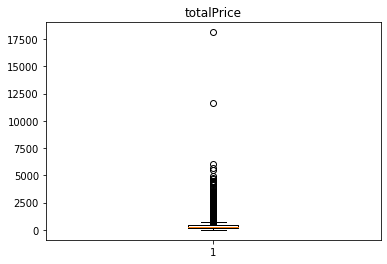

In [48]:
# Box Plot totalPrice
plt.boxplot(dataset['totalPrice'])
plt.title('totalPrice')
plt.show()

In [49]:
# Correcting invalid values in buildingType variable
filt = dataset['totalPrice'] > 7500
dataset.loc[filt, 'totalPrice'] = np.nan
dataset['totalPrice'] = dataset['totalPrice'].replace(to_replace=np.nan,value=dataset['buildingType'].mean())

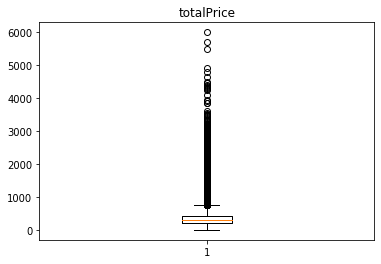

In [50]:
# Box Plot totalPrice
plt.boxplot(dataset['totalPrice'])
plt.title('totalPrice')
plt.show()

In [51]:
dataset.to_csv('data_cleaned.csv', index = False, encoding = 'iso-8859-1')

# Feature Selection

#### According to Correlation Heat map, below features are been selected to be removed since it doesn't contribute much to the dependent variable.

In [52]:
# Dropping less correlated variables
c = ['Lng', 'Lat', 'kitchen', 'buildingType', 'ladderRatio', 'fiveYearsProperty','price']

In [53]:
def dropCol(col , df):
    return df.drop(col, axis=1)

In [54]:
for col in c:
    dataset = dropCol(col,dataset)

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 16 columns):
tradeTime              318851 non-null object
followers              318851 non-null int64
totalPrice             318851 non-null float64
square                 318851 non-null float64
livingRoom             318851 non-null float64
drawingRoom            318851 non-null float64
bathRoom               318851 non-null float64
renovationCondition    318851 non-null int64
buildingStructure      318851 non-null int64
elevator               318851 non-null float64
subway                 318851 non-null float64
district               318851 non-null int64
communityAverage       318851 non-null float64
floorType              318851 non-null object
floorNumber            318851 non-null float64
propertyAge            318851 non-null float64
dtypes: float64(10), int64(4), object(2)
memory usage: 38.9+ MB


In [56]:
dataset.head()

,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,bathRoom,renovationCondition,buildingStructure,elevator,subway,district,communityAverage,floorType,floorNumber,propertyAge
0,2016,106,415.0,131.00,2.0,1.0,1.0,3,6,1.0,1.0,7,56021.0,¸ß,26.0,11.0
1,2016,126,575.0,132.38,2.0,2.0,2.0,4,6,1.0,0.0,7,71539.0,¸ß,22.0,12.0
2,2016,48,1030.0,198.00,3.0,2.0,3.0,3,6,1.0,0.0,7,48160.0,ÖÐ,4.0,11.0
3,2016,138,297.5,134.00,3.0,1.0,1.0,1,6,1.0,0.0,6,51238.0,µ×,21.0,8.0
4,2016,286,392.0,81.00,2.0,1.0,1.0,2,2,0.0,1.0,1,62588.0,ÖÐ,6.0,56.0


In [57]:
df_dummies = pd.get_dummies(dataset, columns=['tradeTime', 'livingRoom', 'drawingRoom', 'bathRoom', 'renovationCondition', 'buildingStructure', 'elevator', 'subway', 'district', 'floorType'], drop_first=True)

In [58]:
tot_price = df_dummies.pop('totalPrice')
df_dummies['totalPrice'] = tot_price

In [59]:
df_dummies.head()

,followers,square,communityAverage,floorNumber,propertyAge,tradeTime_2003,tradeTime_2008,tradeTime_2009,tradeTime_2010,tradeTime_2011,tradeTime_2012,tradeTime_2013,tradeTime_2014,tradeTime_2015,tradeTime_2016,tradeTime_2017,tradeTime_2018,livingRoom_1.0,livingRoom_2.0,livingRoom_3.0,livingRoom_4.0,livingRoom_5.0,livingRoom_6.0,livingRoom_7.0,livingRoom_8.0,livingRoom_9.0,drawingRoom_1.0,drawingRoom_2.0,drawingRoom_3.0,drawingRoom_4.0,drawingRoom_5.0,bathRoom_1.0,bathRoom_2.0,bathRoom_3.0,bathRoom_4.0,bathRoom_5.0,bathRoom_6.0,bathRoom_7.0,renovationCondition_2,renovationCondition_3,renovationCondition_4,buildingStructure_2,buildingStructure_3,buildingStructure_4,buildingStructure_5,buildingStructure_6,elevator_1.0,subway_1.0,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_13,floorType_µ×,floorType_¶¥,floorType_¸ß,floorType_Î´Öª,floorType_ÖÐ,totalPrice
0,106,131.00,56021.0,26.0,11.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,415.0
1,126,132.38,71539.0,22.0,12.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,575.0
2,48,198.00,48160.0,4.0,11.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1030.0
3,138,134.00,51238.0,21.0,8.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,297.5
4,286,81.00,62588.0,6.0,56.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,392.0


In [60]:
df_dummies.to_csv('final_data_cleaned_dummies.csv', index = False, encoding = 'iso-8859-1')